In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("education.csv")
df.head()


,video_title,views,likes,comments,comment_sentiment,duration_minutes,channel_subscribers
0,Python Basics Tutorial,120000,4500,800,0.75,45,250000
1,Machine Learning Full Course,98000,3800,620,0.72,120,300000
2,Data Science Roadmap,56000,2600,410,0.68,30,180000
3,Java for Beginners,43000,1900,320,0.60,40,150000
4,Statistics Explained,39000,1700,280,0.66,35,140000


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   video_title          72 non-null     object 
 1   views                72 non-null     int64  
 2   likes                72 non-null     int64  
 3   comments             72 non-null     int64  
 4   comment_sentiment    72 non-null     float64
 5   duration_minutes     72 non-null     int64  
 6   channel_subscribers  72 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 4.1+ KB


,views,likes,comments,comment_sentiment,duration_minutes,channel_subscribers
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,61527.777778,2766.666667,455.833333,0.700556,45.819444,196527.777778
std,14793.386629,584.301678,95.087062,0.030760,11.428068,39596.191388
min,36000.000000,1600.000000,260.000000,0.600000,25.000000,130000.000000
25%,51000.000000,2400.000000,390.000000,0.680000,40.000000,163750.000000
50%,60000.000000,2750.000000,450.000000,0.705000,45.000000,192500.000000
75%,69000.000000,3100.000000,520.000000,0.720000,50.000000,221250.000000
max,120000.000000,4500.000000,800.000000,0.750000,120.000000,300000.000000


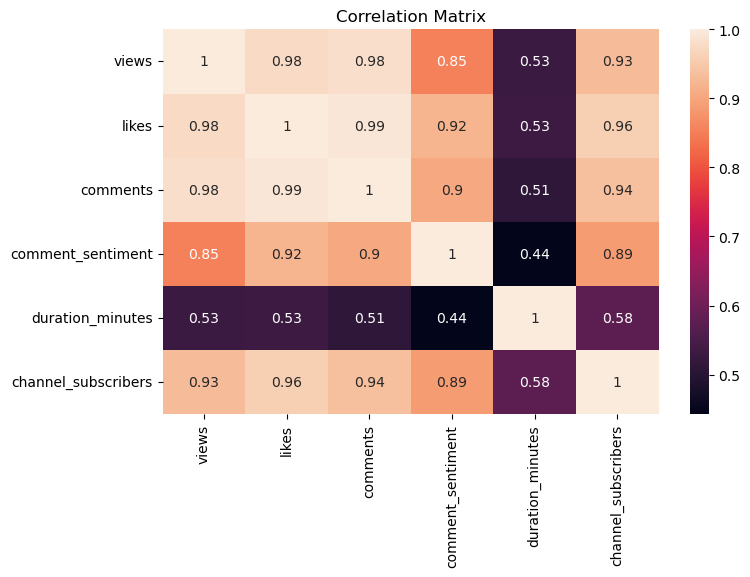

In [5]:
plt.figure(figsize=(8,5))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


In [6]:
df["like_ratio"] = df["likes"] / df["views"]


In [7]:
df["comment_ratio"] = df["comments"] / df["views"]


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_features = scaler.fit_transform(
    df[["views", "like_ratio", "comment_ratio", "comment_sentiment", "duration_minutes", "channel_subscribers"]]
)

scaled_df = pd.DataFrame(
    scaled_features,
    columns=["views","like_ratio","comment_ratio","sentiment","duration","subscribers"]
)


In [9]:
df["EQS"] = (
    0.25 * scaled_df["like_ratio"] +
    0.20 * scaled_df["comment_ratio"] +
    0.25 * scaled_df["sentiment"] +
    0.15 * scaled_df["duration"] +
    0.15 * scaled_df["subscribers"]
)


In [10]:
df_sorted = df.sort_values(by="EQS", ascending=False)
df_sorted[["video_title", "EQS"]].head(10)


,video_title,EQS
66,Streamlit Tutorial,0.783611
69,End to End ML Project,0.774182
68,FastAPI Intro,0.764431
71,Placement Roadmap DS,0.764282
70,Data Science Portfolio,0.756554
55,Python Automation,0.741947
67,Flask for ML,0.735851
61,AWS Basics,0.720136
40,LLM Basics,0.705797
48,Power BI Basics,0.705176


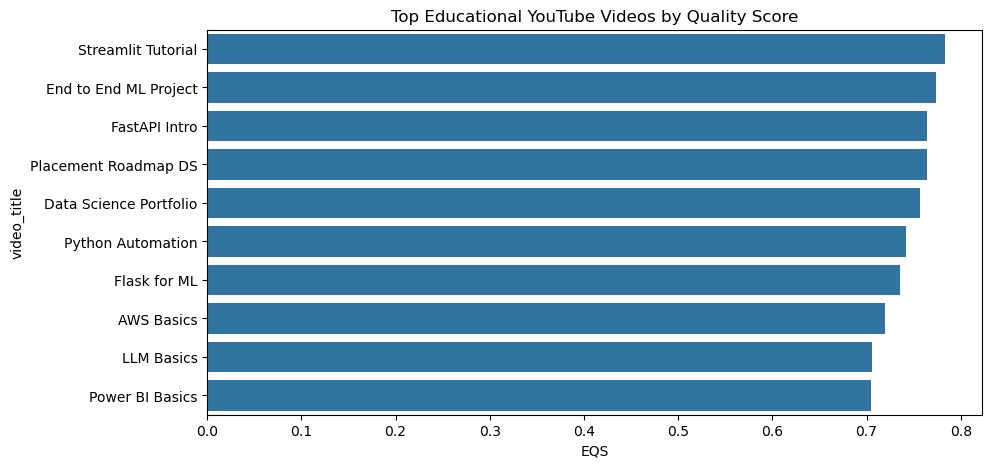

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x="EQS", y="video_title", data=df_sorted.head(10))
plt.title("Top Educational YouTube Videos by Quality Score")
plt.show()


In [12]:
def quality_label(score):
    if score >= 0.7:
        return "High Quality"
    elif score >= 0.5:
        return "Medium Quality"
    else:
        return "Low Quality"

df["quality_category"] = df["EQS"].apply(quality_label)
df[["video_title", "quality_category"]].head()


,video_title,quality_category
0,Python Basics Tutorial,Low Quality
1,Machine Learning Full Course,Medium Quality
2,Data Science Roadmap,Medium Quality
3,Java for Beginners,Low Quality
4,Statistics Explained,Low Quality


In [19]:
df.sort_values("EQS", ascending=False).groupby("quality_category").head(3)[
    ["quality_category", "video_title", "EQS", "views", "likes"]
]


,quality_category,video_title,EQS,views,likes
66,High Quality,Streamlit Tutorial,0.783611,68000,3200
69,High Quality,End to End ML Project,0.774182,85000,3900
68,High Quality,FastAPI Intro,0.764431,66000,3100
32,Medium Quality,Hyperparameter Tuning,0.679713,53000,2500
49,Medium Quality,Tableau for Beginners,0.674603,68000,3100
21,Medium Quality,EDA Complete Guide,0.672133,69000,3100
26,Low Quality,KMeans Clustering,0.485837,44000,2000
12,Low Quality,Excel for Data Analysis,0.479847,47000,2100
25,Low Quality,KNN Algorithm,0.472515,42000,1900
